In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import pickle
from tqdm.notebook import tqdm
from difflib import SequenceMatcher

In [4]:
#Displaying all the rows of the dataframe
pd.set_option('display.max_rows', None)

<h1>1. Loading the data</h1>
<ol>
<li>Load the json file</li>
<li>Print 10 sample rows from the dataframe</li>
<li>Check the number of features</li>
<li>Check the number of rows</li>
<li>Describing the dataframe</li>
</ol>

In [2]:
#Loading the json file

data = pd.read_json('tops_fashion.json')

In [3]:
#Displaying 10 samples from dataframe
data.sample(10)

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
111548,None,B06ZY8S9WV,SHIRT,$265.00,None,Ivory/Navy,Elizabeth and James,None,Usually ships in 24 hours,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,Elizabeth and James Women's Wind Veronique Sil...,None,https://images-na.ssl-images-amazon.com/images...,None,A gathered chiffon overlay that falls to an as...
29336,None,B071JDLPYN,SHIRT,None,None,None,xianwei,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Women's Short Neck Sleeve Karlsruhe Cotton T-S...,None,https://images-na.ssl-images-amazon.com/images...,None,":SIZING (INCH):S: Chest 18"" Length 24.5"" M: Ch..."
5471,None,B01M68XA6C,SHIRT,None,None,Black,Black Market Art,Black Market Art,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Women's Dead Queen by Charlie Medina Day of th...,W-DEADQUEEN,https://images-na.ssl-images-amazon.com/images...,Black Market Art,<p>Preshrunk black tee. Premium 100% cotton fa...
82730,None,B01N5NG2RW,SHIRT,None,None,None,SheIn,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,SheIn Women's Cute Striped Peter Pan Collar Sh...,None,https://images-na.ssl-images-amazon.com/images...,None,"Size Chart:<br> X-Small: Bust: 110cm/37.8"", Le..."
161482,None,B01MG2EMBE,SHIRT,None,None,"Grey, Gray, Charcoal, White",Sorority Letters Shop,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Gamma Phi Beta Varsity Long Sleeve T-Shirt,None,https://images-na.ssl-images-amazon.com/images...,None,Our Gamma Phi Beta long sleeve v-neck comes in...
131169,None,B074JVXBSF,SHIRT,None,None,Red,Dorahome,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Dorahome Women's This Is My Too Tired To Funct...,None,https://images-na.ssl-images-amazon.com/images...,None,The T Shirt Will Be The Best And Sincere Gift ...
145107,None,B01FP04E9M,SHIRT,None,None,Coral,Kerusso,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Wise Owl Christian T-Shirt,APT2352,https://images-na.ssl-images-amazon.com/images...,None,There is only one path that leads to a life fi...
126109,None,B074WKZS37,SHIRT,$19.97,None,Pink Rose,Liz Claiborne New York,None,Usually ships in 24 hours,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,Liz Claiborne NY Striped Tank_w Lace Overlay A...,None,https://images-na.ssl-images-amazon.com/images...,None,<P>Better together. Liz Claiborne breathes new...
49824,None,B01EQSXF6W,UNDERWEAR,None,None,None,Anboo,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Anboo Women Boho Tank Bustier Bra Vest Crop To...,Generic -NDJ79,https://images-na.ssl-images-amazon.com/images...,None,"<br>Size S <br>Bust 66cm/26.0"" <br>Length 38cm..."
78752,None,B073WVCY5C,SHIRT,None,None,None,Brawdress,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://ima

In [4]:
#Displaying the total number of features
len(data.columns)

#There are total 19 features in the dataset

19

In [5]:
#Displaying the total number of rows
data.shape[0]

#There are total 183138 data points in the dataset

183138

<h1>2. Data cleaning and pre processing </h1>
<ol>
<li>Removing columns</li>
<li>Removing null and duplicate rows</li>
</ol>

In [6]:
data.sample(1)

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
41169,None,B0741VNMBK,DRESS,None,None,None,Cheryl Bull Dresses,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Cheryl Bull Popular Womens Hot O Neck Slit Lon...,None,https://images-na.ssl-images-amazon.com/images...,None,Welcome to Cheryl Bull store.Our shops bring i...


<b>2.1. Out of 19 features we will only use 6 features - "asin, product_type_name, color,brand, medium_image_url, title"

In [ ]:
#The title of the products holds the most information, hence we will use it 
#Other features like sku,author,publisher,availabilty etc are not very useful with respect to our task
#Selecting asin, product_type_name, color, brand, small_image_url, title for our model

df=data.loc[:,['asin','product_type_name','color','brand','medium_image_url','title']]

In [8]:
#Displaying 2 samples of the new data frame

df.sample(2)

,asin,product_type_name,color,brand,medium_image_url,title
132942,B01MTN1Y2A,SHIRT,Deep Turquoise,Celebrity Pink,https://images-na.ssl-images-amazon.com/images...,Celebrity Pink Juniors' Sweatshirt Deep Turquo...
57574,B01H28442C,SHIRT,None,Russell Athletic,https://images-na.ssl-images-amazon.com/images...,RUSSELL Ladies Casual Short Sleeved Polo Tee S...


In [9]:
df.shape
#Now we have 6 features and 183186 data points

(183138, 6)

<b>2.2.0 Checking the number of unique asin number

In [10]:
df.loc[:,['asin']].nunique()

#Since the total data points in out dataset is 183138 and unique asin number is same, hence we dont have duplicate asin number

asin    183138
dtype: int64

<b>2.2.1 Checking the number of duplicate title

In [11]:
df.shape[0]-df['title'].nunique()
#There are total 7153 duplicate titles in our dataframe

7153

<b>2.2.2 Checking the number of duplicate medium_image_url

In [13]:
data.loc[:,['medium_image_url']].nunique()

medium_image_url    170782
dtype: int64

<b>2.2.3 Checking the number of Null rows in our dataframe

In [16]:
#Checking how many rows are have no null values
df[~df.isna().any(axis=1)]

#There are 64843 rows which dont have null values, we will use these rows for further processes

,asin,product_type_name,color,brand,medium_image_url,title
4,B004GSI2OS,SHIRT,Onyx Black/ Stone,FeatherLite,https://images-na.ssl-images-amazon.com/images...,Featherlite Ladies' Long Sleeve Stain Resistan...
5,B00TAEHGGS,SHIRT,Grape,Fitscloth,https://images-na.ssl-images-amazon.com/images...,[Fits Cloth] Grape Solid Modern Long Sleeve Pl...
6,B012YX2ZPI,SHIRT,White,HX-Kingdom Fashion T-shirts,https://images-na.ssl-images-amazon.com/images...,Women's Unique 100% Cotton T - Special Olympic...
8,B06Y2LCC5S,SHIRT,Black,Fashion2ne1,https://images-na.ssl-images-amazon.com/images...,Standing on His Promises Rhinestones T-Shirt R...
11,B001LOUGE4,SHIRT,Black,Fitness Etc.,https://images-na.ssl-images-amazon.com/images...,Ladies Cotton Tank 2x1 Ribbed Tank Top
...,...,...,...,...,...,...
183124,B01AVN150E,SHIRT,Multi,Sacred Threads,https://images-na.ssl-images-amazon.com/images...,Printed Top in Assorted Colors – One size #215...
183133,B01MSALTSO,OUTERWEAR,Black,TOOGOO(R),https://images-na.ssl-images-amazon.com/images...,TOOGOO(R) Women's Tops Spring Autumn Casual Pu...
183134,B015W98YQK,SHIRT,Monochrome Plaid,VOGUE CODE,https://images-na.ssl-images-amazon.com/images...,VOGUE CODE Vintage V Neck Plaid Shirt Sleevele...
183135,B075756PGC,SHIRT,Pink,Wrangler,https://images-na.ssl-images-amazon.com/images...,Wrangler George Strait For Her Long Sleeve Pin...


<b>2.2.4 Saving the 64k data points

In [59]:
#Saving 64k rows
df=df[~df.isna().any(axis=1)].sort_values(by=["title"]) 

#We have saved data with sorting the title
df.to_pickle('G:\Jupyter Notebook\Amazon recommendor\64k_apparel_data')

<b>2.2.5 Dropping the rows that have duplicate image URL

In [62]:
#Check if we have duplicate image url
df[df.loc[:].duplicated(subset='title',keep='first')]
#We have 3275 rows that have duplicate titles
#Lets drop the rows that have duplicate titles

,asin,product_type_name,color,brand,medium_image_url,title
68008,B01LXRS563,SHIRT,Green,Faithful Findings,https://images-na.ssl-images-amazon.com/images...,"#Hope, Women's Jr Size Tee, Religious, Faith-I..."
132703,B01LXRRR0B,SHIRT,Gray,Faithful Findings,https://images-na.ssl-images-amazon.com/images...,"#Love, Women's Jr Size Tee, Religious, Faith-I..."
70689,B00UUEQ8AC,SHIRT,B318 SD_BLACK,GLJ TRADING,https://images-na.ssl-images-amazon.com/images...,(Plus Size) Cutout Crochet Lined Tunic with Ch...
106504,B013PQW6CK,SHIRT,Mocha,GLJ TRADING,https://images-na.ssl-images-amazon.com/images...,(Plus Size) Solid Color Long Sleeve Asymmetric...
127007,B013PQW50S,SHIRT,Mocha,GLJ TRADING,https://images-na.ssl-images-amazon.com/images...,(Plus Size) Solid Color Long Sleeve Asymmetric...
...,...,...,...,...,...,...
108937,B074PJZFPQ,SHIRT,Red,General,https://images-na.ssl-images-amazon.com/images...,shirts
140760,B074HZVQRL,SHIRT,Yellow,General,https://images-na.ssl-images-amazon.com/images...,shirts
109757,B074J7886V,SHIRT,Blue,General,https://images-na.ssl-images-amazon.com/images...,shirts
40665,B01DF4EV8E,SHIRT,Black,Vihaan Impex,https://images-na.ssl-images-amazon.com/images...,vihaan impex kurtis for women indian kurti for...


<b>2.2.6 Removing the rows that have duplicate titles

In [75]:
#Saving the index of rows that are duplicate
index_title_duplicate = df[df.loc[:].duplicated(subset='title',keep='first')].index

#Removing the data points that have duplicate title
df = df.drop(index_title_duplicate)

<b>2.2.7 Saving the new 61k data points

In [78]:
#Saving this updated dataframe in pickle file
df.reset_index(inplace=True)
df.to_pickle('G:\Jupyter Notebook\\Amazon recommendor\\pickles\\61k_apparel_data')

<b>2.2.8 On further inspection we can seen that there are many titles that look very similar</b>
<ul>
    <li>We will inspect row 61465 and 61566</li>
    <li>we will inspect row 18,19 and 20</li>
    <li>we will inspect row 34 an 35</li>
    <li>we will remove the rows that have very similar title</li>

In [92]:
#Lets do further inspection of row number 61565 and 61566
rows=df.loc[[61565,61566],['medium_image_url','title']].values

In [96]:
print("Title")
print(rows[0][1])
print(rows[1][1])

print("*"*80)
print("Image URL")
print(rows[0][0])
print(rows[1][0])

#Here if we see the titles are very similar except the "L" character

Title
✽ANGLIN✽ Women Striped Floral Long Sleeve Round Neck Shirt Top Blouse
✽ANGLIN✽ Women Striped Floral Long Sleeve Round Neck Shirt Top Blouse (L)
********************************************************************************
Image URL
https://images-na.ssl-images-amazon.com/images/I/41C4l8B%2BMYL._SL160_.jpg
https://images-na.ssl-images-amazon.com/images/I/41mGx0VwrbL._SL160_.jpg


In [222]:
#This method is used to display image 
#The image_list_URL contains the URL and title of the query ID

def display_image(image_list_URL):
    
    #Setting the figure size
    fig,ax = plt.subplots(1,len(image_list_URL))
    fig.set_figwidth(15)
    
    #This loop will iterate through all the values in image_list_URL
    for i in range(len(image_list_URL)):
        URL = str(image_list_URL[i])
        print(URL)
        response = requests.get(image_list_URL[i][0])
        img = Image.open(BytesIO(response.content))
        
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
        plt.show()
    

In [217]:
#Saving the 61k data points

df.to_pickle('G:\Jupyter Notebook\\Amazon recommendor\\pickles\\61k_apparel_data')

['https://images-na.ssl-images-amazon.com/images/I/41T-H36b15L._SL160_.jpg'
 '"Life is a Journey" Self-Help DIY T-Shirt (Women,Silver,Female Large)']
['https://images-na.ssl-images-amazon.com/images/I/41T-H36b15L._SL160_.jpg'
 '"Life is a Journey" Self-Help DIY T-Shirt (Women,Silver,Female X-Large)']
['https://images-na.ssl-images-amazon.com/images/I/31eH391lX0L._SL160_.jpg'
 '"Life is a Journey" Self-Help DIY T-Shirt (Women,White,Female X-Large)']


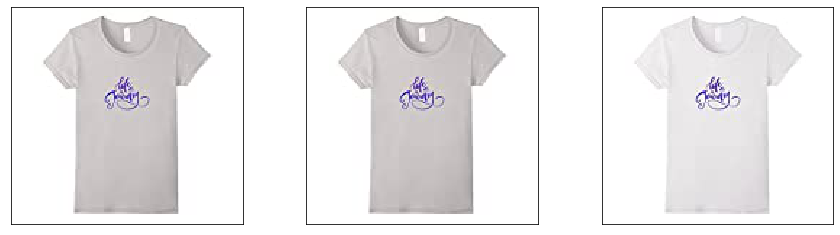

In [223]:
display_image(df.loc[[18,19,20],['medium_image_url','title']].values)

#Here we can see that the title is almost same which just few words changed, also in this case the query image is also
#very similar

['https://images-na.ssl-images-amazon.com/images/I/51%2B0L0c7N0L._SL160_.jpg'
 '#Hope, Inspirational, Ladies Raglan, Christian Tee, Fuchsia']
['https://images-na.ssl-images-amazon.com/images/I/41fNMA-YCyL._SL160_.jpg'
 '#Hope, Inspirational, Ladies Raglan, Christian Tee, White']


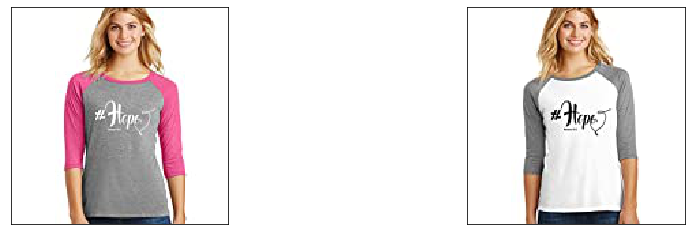

In [224]:
display_image(df.loc[[34,35],['medium_image_url','title']].values)

#Here we can see that the title is almost same which just few words changed, also in this case the query image is also
#very similar

<h4>Conclusion :</h4>
<h4>From above examples we can see that, there are few data points which has almost same title and the image is also very similar</h4>
    
<b>We will remove such rows which are almost duplicate</b>

In [5]:
#Loading the data
data = pd.read_pickle('pickles\\61k_apparel_data')

In [5]:
#This method removes title based on the similarity between 2 sentences
#The title_list argument takes a list of of titles - in this case we will give all the titles from the dataframe
#the similar_title argumnets take value ranging from 0.0 to 1.00

def remove_similar_title(title_list,similar_percent=0.85):
    
    #this variable will hold the latest ID of title that are very similar
    to_drop=[]
    
    counter=0
    for i in tqdm(range(len(title_list))):
        
        if(counter>0):
            counter=counter-1
            continue

        for j in range(i+1,len(title_list)):
            
            #To calculate the similarity between 2 sentence we wiill use SequenceMatcher from difflib
            s = SequenceMatcher(None,title_list[i], title_list[j]).ratio()

            if(s>0.85 and s!=1.0):

                to_drop.append(j)
                counter=counter+1
            else:
                break
    return  list(set(to_drop))

In [14]:
#Making a list out of all the title available in our dataframe
title_list = [i[0] for i in data.loc[:,['title']].values.tolist()]

#Running the remove_similar_title method to get the IDs that have similar title
index_to_remove = remove_similar_title(title_list)

In [17]:
#Removing the rows that have very similar titles
data.drop(index_to_remove,inplace=True)

In [19]:
#Saving the 48k data for further 
data.to_pickle('G:\Jupyter Notebook\Amazon recommendor\\pickles\\48k_apparel_data')

#This is the file that we will use to make further progress